# 阅读笔记

** 作者：方跃文 **

** Email: fyuewen@gmail.com **

** 时间：始于2017年9月12日， 结束写作于 **

** 第五章笔记始于2018年1月6日，结束于2018年July 20th**

这一章节虽然跨度很长，不过在1月到7月之间，pandas估计已经被上百次地应用到了我地实际研究中用于数据处理.
The note on this chapter was finally finished today, I was quite happy because it has lasted
quite a long time.


# 第五章 pandas 入门

** 时间： 2017年1月6日清晨**

panas 是原书作者Wes Mckinney主要想讨论的library，毕竟Mckinney本人就是pandas的开发者。pandas可以帮助数据分析工作，特别是在处理高级数据结构时候，pandas可以简化这些复杂的工作。pandas是基于NumPy构建的，因此会让以NumPy为中心的应用变得更加简单。尽管Pandas的构建哲学基于Numpy，但是两者也是有一处显著差别的，即
**
While pandas adopts many coding idioms from NumPy, the biggest difference is that pandas is designed for working with tabular or heterogeneous data. NumPy, by contrast, is best suited for working with homogeneous numerical array data.**

Pandas其实是Mckinney在AQR量化投资管理公司任职时候开始编写的，最初他是为了满足工作需求才编写的。之后Pandas不断壮大，使得功能越来越丰富。不过Mckinney也认为后来的Pandas有点违背了自己的初衷，因为他其实是希望它能保留简介性和易用性。

在本书中，我们做如下的约定，即

In [1]:
from pandas import Series, DataFrame

In [2]:
import pandas as pd

这有点像之前那样的，我们约定 np 代表 numpy。因为 Series 和 DataFrame 用的次数非常多，所以将其引入命名空间会更加方便

## Pandas的数据结构介绍

要想顺畅得使用pandas，就必须熟悉它的两个主要数据结构：Series 和 DataFrame。虽然它们并不能解决所有问题，不过它们为大多数应用提供了一种可靠的，易于使用的基础。

### Series

Series 是一种类似于一维数组的对象，它由一组数据（各种NumPy数据类型）以及一组与之相关的数据标签（即索引）组成。仅有一组数据即可产生最简单的Series。

例如：

In [3]:
from pandas import Series

a = [4, 5, 2, -4]
obj = Series(a)

In [4]:
obj

0    4
1    5
2    2
3   -4
dtype: int64

In [5]:
obj2=obj+obj
obj2

0     8
1    10
2     4
3    -8
dtype: int64

从上面我们可以看到，Series 的字符串表现形式为：索引在左边，值在右边。因为我们上面没有为数据指定特殊的索引，所以系统会自动创建一个 0 到 N-1 （N为数据的长度）的整数型索引。你可以通过 Series 的 values 和 index 属性获取数组表示形式和索引对象：

In [6]:
obj.values

array([ 4,  5,  2, -4])

In [7]:
obj.index # 注意，如果使用python 2，显示的结果可能在形式上有点不同。

RangeIndex(start=0, stop=4, step=1)

大部分情况下，我们更希望去定制索引，以方便我们的使用。例如

In [9]:
obj2 = Series([4, 5, 2 ,-4], index=['d', 'b', 
                                    'a', 'c'])

In [10]:
obj2.values

array([ 4,  5,  2, -4])

In [11]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [12]:
obj2['a']

2

我们可以看到上面，与普通的numpy数组相比，我们可以通过索引的方式选取Series中的单个或者一组值。

In [14]:
obj2[['a', 'b']]

a    2
b    5
dtype: int64

In [35]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

obj11 = Series(np.arange(10))
print('value of obj11 is', obj11.values)
print('index of obj11 is', obj11.index)

obj13 = Series([1,2,3,4], index=['a','b','c','d'])
print('index of obj13 is', obj13.index)
print('value of obj13 is', obj13.values)
print('print the values that are large than 3\n', obj13[obj13>2])
print(obj13['b'])
print(obj13[['b','c']])
print(obj11[2])

obj13=obj13*2
print(obj13)

value of obj11 is [0 1 2 3 4 5 6 7 8 9]
index of obj11 is RangeIndex(start=0, stop=10, step=1)
index of obj13 is Index(['a', 'b', 'c', 'd'], dtype='object')
value of obj13 is [1 2 3 4]
print the values that are large than 3
 c    3
d    4
dtype: int64
2
b    2
c    3
dtype: int64
2
a    2
b    4
c    6
d    8
dtype: int64


通过上面我们可以看出，pandas中的数组操作，都会保留索引和值之间的链接。

此外，还可以将Series看成一个定长的有序字典，因为它是索引值到数据值的一个映射。它可以用在许多原本需要字典参数的函数中：

In [38]:
'b' in obj13

True

In [39]:
'e' in obj13

False

如果数据被存放在一个python字典中，也可以直接通过这个字典创建Series, 特别地，如果只传入一个字典，则Series中得到的索引就是原始字典中的键（有序排列）

In [43]:
sdata = {'Kyoto': 35000, "Tokyo": 40000, "Sendai": 30000, "Nagoya": 45000}
sdata

{'Kyoto': 35000, 'Nagoya': 45000, 'Sendai': 30000, 'Tokyo': 40000}

In [54]:
obj4 = Series(sdata)
print(obj4)

Kyoto     35000
Nagoya    45000
Sendai    30000
Tokyo     40000
dtype: int64


In [52]:
cities = ['Kyoto', 'Osaka', 'Sendai', 'Nagoya']
obj5=Series(sdata, index=cities)
print(obj5)

Kyoto     35000.0
Osaka         NaN
Sendai    30000.0
Nagoya    45000.0
dtype: float64


在上例中，sdata 中跟cities索引相匹配的三个值会被找出来并放到相应的位置上，但是由于Osaka所对应的sdata值没有找到，所以它的值为NaN，即非数字（not a number）。在Pandas中，它用于表示确实或NA值。本书中，我们使用missing或者NA表示缺失的数据。pandas的 isnull 和 notnull 函数可以用于检测缺失数据。

In [55]:
pd.isnull(obj5)

Kyoto     False
Osaka      True
Sendai    False
Nagoya    False
dtype: bool

In [56]:
pd.notnull(obj5)

Kyoto      True
Osaka     False
Sendai     True
Nagoya     True
dtype: bool

Series 也有类似的实例方法：

In [58]:
obj5.isnull()

Kyoto     False
Osaka      True
Sendai    False
Nagoya    False
dtype: bool

In [57]:
obj5.notnull()

Kyoto      True
Osaka     False
Sendai     True
Nagoya     True
dtype: bool

在这一章节之后的内容中，我们将详细讲解如何处理缺失数据。

对于许多应用而言，Series最重要的功能之一就是，它在算术运算中会自动对其不同索引的数据。这句话不太好理解，我们可以通过看下面的例子加深了解。

In [59]:
obj4

Kyoto     35000
Nagoya    45000
Sendai    30000
Tokyo     40000
dtype: int64

In [60]:
obj5

Kyoto     35000.0
Osaka         NaN
Sendai    30000.0
Nagoya    45000.0
dtype: float64

In [62]:
obj5+obj4

Kyoto     70000.0
Nagoya    90000.0
Osaka         NaN
Sendai    60000.0
Tokyo         NaN
dtype: float64

关于数据对其的功能，我们之后还会详细介绍，此处暂时跳过。

Series 对象本身以及索引都有一个name属性，该属性跟pandas其他的关键功能关系非常密切：

In [71]:
obj4.name = 'population'

In [72]:
obj4.index.name = 'cities'

In [73]:
obj4

cities
Kyoto     35000
Nagoya    45000
Sendai    30000
Tokyo     40000
Name: population, dtype: int64

In [66]:
obj5.name = 'area'

In [67]:
obj5.index.name = 'cities'

In [68]:
obj5

cities
Kyoto     35000.0
Osaka         NaN
Sendai    30000.0
Nagoya    45000.0
Name: area, dtype: float64

我们可以通过直接赋值的方式来修改Series的索引

In [70]:
obj5.index=['A', 'B', 'C', 'D']
print(obj5.index)
print(obj5)

Index(['A', 'B', 'C', 'D'], dtype='object')
A    35000.0
B        NaN
C    30000.0
D    45000.0
Name: area, dtype: float64


**Quiz**: create a Series from dict, use the index from a to z. Finally name the Series.

In [19]:
import numpy as np
import pandas as pd
from pandas import Series
from numpy import  random
import string

series_value = random.randn(26)
letter_string = string.ascii_lowercase[:]
letter_list = [i for i in letter_string]
sample_series = Series(series_value, index=letter_list)
sample_series.index.name = 'lower letters'
sample_series.name = 'random values'
print(sample_series)

lower letters
a    0.102942
b   -1.136504
c    1.128782
d    0.318602
e   -1.782395
f   -0.606587
g    0.397266
h    0.339309
i    1.463112
j    0.628806
k    0.572927
l   -0.724271
m    0.301499
n   -0.625754
o   -0.484199
p   -0.668351
q   -0.624771
r    0.953030
s    0.499872
t    0.265048
u    0.314574
v    0.545502
w   -0.885824
x   -2.017811
y    1.179905
z    0.189060
Name: random values, dtype: float64


### DataFrame

DataFrame是一个表格型的数据结构。它既有行索引也有列索引，所以可以被看作是由Series组成的字典。跟其他类似的数据结构（如R的data.frame)比较，DataFrame中面向行和面向列的操作基本上是平衡的。Pandas中的DataFrame区别于一般python对象（如列表、字典等一维数据结构）的地方在于，它往往以一个或者多个二维块存放。DataFrame的内部技术细节十分复杂，作者说它的复杂程度远超于本书，所以不会做讨论，而只是讨论如何应用它。

虽然DataFrame以二维数据块的方式保存数据，但是我们在实际中还是可以轻松将这它们表示为更高维度的数据。**表格型数据的特征是层次化索引**，这是pandas高级数据处理中需要利用的关键要素。我们之后会讨论这方面的应用

构建DataFrame的方法有很多，最常用的是一种直接传入一个由等长列表或者NumPy数组组成的字典，例如

In [2]:
import pandas as pd
from pandas import DataFrame, Series

In [3]:
data = {'province':['Zhejiang', 'Zhejiang', 'Zhejiang', 'Hubei', 'Hubei'],'area':[101,101,101,185,185],
       'pop':[98,98,98,100,100]}

In [5]:
frame1 = DataFrame(data)
frame1

,area,pop,province
0,101,98,Zhejiang
1,101,98,Zhejiang
2,101,98,Zhejiang
3,185,100,Hubei
4,185,100,Hubei


我们可以看到像Series一样，索引被自动加上，并且字典中的数据都被有序地排列。

如果我们指定列序列，那么DataFrame的列就会按照指定顺序进行排列：

In [6]:
DataFrame(data, columns=['province','area', 'pop'])

,province,area,pop
0,Zhejiang,101,98
1,Zhejiang,101,98
2,Zhejiang,101,98
3,Hubei,185,100
4,Hubei,185,100


同Series相同，如果传入的列在数据中是没有的，那么返回的也是NA值。

In [7]:
frame2 = DataFrame(data,columns=['province', 'pop', 'area', 'history'],index=[1,2,3,4,5])
frame2

,province,pop,area,history
1,Zhejiang,98,101,NaN
2,Zhejiang,98,101,NaN
3,Zhejiang,98,101,NaN
4,Hubei,100,185,NaN
5,Hubei,100,185,NaN


In [8]:
frame2.columns

Index(['province', 'pop', 'area', 'history'], dtype='object')

In [9]:
frame2.index

Int64Index([1, 2, 3, 4, 5], dtype='int64')

通过类似字典标记的方式或属性的方式，可以将DataFrame中的列获取为一个Series

In [10]:
frame2['province']  #标记方式

1    Zhejiang
2    Zhejiang
3    Zhejiang
4       Hubei
5       Hubei
Name: province, dtype: object

In [11]:
frame2.province #属性方式

1    Zhejiang
2    Zhejiang
3    Zhejiang
4       Hubei
5       Hubei
Name: province, dtype: object

我们可以看出来，这个新得到的Series具有与原来DataFrame相同的索引，并且name属性也已经被相应地设置好了。

DataFrame中的行也可以通过位置或者名称的方式进行获取，例如，我们用索引字段ix：

In [13]:
frame2.ix[3]  #ix is derepted in python3, instead use iloc 

province    Zhejiang
pop               98
area             101
history          NaN
Name: 3, dtype: object

列可以通过赋值的方式进行修改。例如，我们可以修改frame2中NaN的history列

In [21]:
frame2['history']=2000

In [22]:
frame2

,province,pop,area,history
1,Zhejiang,98,101,2000
2,Zhejiang,98,101,2000
3,Zhejiang,98,101,2000
4,Hubei,100,185,2000
5,Hubei,100,185,2000


将列表或数组赋值给某个列时，它的长度必须和DataFrame中的长度相匹配(其实就是不能超过原DataFrame中的长度)。如果赋值的是一个Series，就会精确匹配DataFrame中的索引，所欲的空位都将被填上缺失值：

In [23]:
val = Series([2000,3000,2100],index=[1,3,5])

In [24]:
frame2['history']=val

In [25]:
frame2 #index 1，3，5的 被改变了，2和4因为在val中是没有的，所以填入的是NaN

,province,pop,area,history
1,Zhejiang,98,101,2000.0
2,Zhejiang,98,101,NaN
3,Zhejiang,98,101,3000.0
4,Hubei,100,185,NaN
5,Hubei,100,185,2100.0


通过为不存在的列赋值，我们可以给DataFrame增加列，例如

In [29]:
frame2['estern']=frame2.province=="Zhejiang" #将boolean value赋值给estern这个列

In [30]:
frame2 #我们看到frame2中的确增加了一个estern列

,province,pop,area,history,estern
1,Zhejiang,98,101,2000.0,True
2,Zhejiang,98,101,NaN,True
3,Zhejiang,98,101,3000.0,True
4,Hubei,100,185,NaN,False
5,Hubei,100,185,2100.0,False


我们还可以利用 del 这个关键字来对列进行删除

In [31]:
del frame2['estern']

In [33]:
frame2.columns # estern coulumn was delted 

Index(['province', 'pop', 'area', 'history'], dtype='object')

In [38]:
frame2["area"]=frame2["area"]+1

In [39]:
frame2

,province,pop,area,history
1,Zhejiang,98,102,2000.0
2,Zhejiang,98,102,NaN
3,Zhejiang,98,102,3000.0
4,Hubei,100,186,NaN
5,Hubei,100,186,2100.0


**特别注意** 通过索引方式返回的列只是相应数据的视图而已，并不是副本。因此，对返回的Series所做的任何就地修改都会反映到源DataFrame中。通过Series的copy方法可以显示的赋值列。

此外，还有一种常见的数据形式是嵌套字典，也就是字典的字典：

In [55]:
pop = {'Nevada':{2001:2.4, 2002:2.9},
      'Ohio':{2000:1.5, 2001: 1.7, 2002:3.6}}

如果把它传给DataFrame，它会被解释为：外层字典的键作为列，内层的键则作为行索引

In [57]:
frame3 = DataFrame(pop)
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


我们也可以对结果进行转置

In [58]:
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


内层字典的键会被合并、排序以形成最终的索引。如果显示指定了索引，则不会进行自动排序，例如：

In [65]:
DataFrame(pop, index=[2001,2002,2000])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [66]:
DataFrame(pop, columns=["Ohio", "Nevada"])

,Ohio,Nevada
2000,1.5,NaN
2001,1.7,2.4
2002,3.6,2.9


In [67]:
DataFrame(pop, columns=["Ohio", "Nevada"],index=[2002,2001,2000])

,Ohio,Nevada
2002,3.6,2.9
2001,1.7,2.4
2000,1.5,NaN


这里，我重新复习一下上面DataFrame的内容。以原书数据作为参照。

In [20]:
#这里我们利用一种由列表组成的字典来创建DataFrame，后面我还会提及一种利用嵌套字典来创建的方式
import pandas as pd
import numpy as np
from pandas import DataFrame
data = {'state':['Ohio','Ohio','Ohio','Nevada','Nevada'],
       'year':[2000,2001,2002,2001,2002],
       'pop':[1.5, 1.7, 3.6, 2.4, 2.9]}
frame = DataFrame(data)
frame

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002


In [23]:
frame.iloc[1]

pop       1.7
state    Ohio
year     2001
Name: 1, dtype: object

In [ ]:
现在我们想一下，如何让这个表格按照'year','state','pop'顺序来排列？

In [7]:
f = DataFrame(data, columns = ['year', 'state', 'pop'])
f

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9


In [8]:
f.sort_values(by=['year'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
3,2001,Nevada,2.4
2,2002,Ohio,3.6
4,2002,Nevada,2.9


In [9]:
#类似地，我们可以按照人口数量来从小到大排列。
f.sort_values(by=['pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
3,2001,Nevada,2.4
4,2002,Nevada,2.9
2,2002,Ohio,3.6


In [51]:
#反过来，我们根据人口数量从大到小进行排序
df = f.sort_values(by=['pop'],ascending=False) #ascend means ‘go up'.
df

,year,state,pop
2,2002,Ohio,3.6
4,2002,Nevada,2.9
3,2001,Nevada,2.4
1,2001,Ohio,1.7
0,2000,Ohio,1.5


现在来看看，如何让上面这个名字为df的table增加一个新的列，列的名字叫做area,并且填入随机数

In [53]:
sLength = len(df['year']) # 得到行的数目
print(sLength)
df1=df.assign(area=pd.Series(np.random.randn(sLength)).values)
df1

5


,year,state,pop,area
2,2002,Ohio,3.6,-0.291933
4,2002,Nevada,2.9,0.211031
3,2001,Nevada,2.4,-1.842033
1,2001,Ohio,1.7,0.622782
0,2000,Ohio,1.5,0.771472


In [ ]:
还有一种方法就是给一个新的列赋值，这也是增加列的方法：

In [54]:
df['area'] = pd.Series(np.random.randn(sLength)).values
df

,year,state,pop,area
2,2002,Ohio,3.6,2.369642
4,2002,Nevada,2.9,0.757479
3,2001,Nevada,2.4,1.339060
1,2001,Ohio,1.7,0.063255
0,2000,Ohio,1.5,1.280906


但是需要注意的是，上面assign的方法不会直接改原有的DataFrame，而后一种方法直接给新列赋值的方法是直接修改原始DataFrame的。因为在DataFrame中，任何通过索引方式返回的Series修改，都会反应到原始的DataFrame中。而如果想利用后一种方法，但是又不想改变原来的DataFrame，那么就首先要显示的创建一个副本。

下面我展示一个创建副本，并且对副本进行列删除的操作。

In [59]:
df2=df.copy()
print(df2)
print('\n')
del df2['area']  #delet a column in df2
print(df2)
print('\n')
print(df)

   year   state  pop      area
2  2002    Ohio  3.6  2.369642
4  2002  Nevada  2.9  0.757479
3  2001  Nevada  2.4  1.339060
1  2001    Ohio  1.7  0.063255
0  2000    Ohio  1.5  1.280906


   year   state  pop
2  2002    Ohio  3.6
4  2002  Nevada  2.9
3  2001  Nevada  2.4
1  2001    Ohio  1.7
0  2000    Ohio  1.5


   year   state  pop      area
2  2002    Ohio  3.6  2.369642
4  2002  Nevada  2.9  0.757479
3  2001  Nevada  2.4  1.339060
1  2001    Ohio  1.7  0.063255
0  2000    Ohio  1.5  1.280906


上面是对一个已经存在的DataFrame增加一个列。在利用上面的data字典进行构建DataFrame的时候，我们也可以增加一个列。例如：

In [24]:
frame2 = DataFrame(data, columns=['year','state','pop','debt'], index =['one',
                                                                       'two',
                                                                       'three',
                                                                       'four',
                                                                       'five'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


In [25]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

上面我展示了如何对一个已经或者新构建的DataFrame增加一个列。现在我们来看看，利用类似字典标记的方式，如何来轻松获取DataFrame中的某个特别的列。我这里介绍两种方式：

In [34]:
#方法1
frame2['pop']

one      1.5
two      1.7
three    3.6
four     2.4
five     2.9
Name: pop, dtype: float64

In [36]:
#方法2
frame2.year #当我实用frame2.pop时候出现的结果和我预想的不同，这似乎是因为pop是python中毕竟特殊的关键字？

one      2000
two      2001
three    2002
four     2001
five     2002
Name: year, dtype: int64

In [ ]:
上面是从DataFrame中获取列，同样地我们也可以通过位置或名称地方式来获取行，比如用索引字段ix

In [37]:
frame2.ix['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

列可以通过赋值地方式进行修改。例如我们可以给frame2中地‘debt’列填入新数据：

In [40]:
frame2['debt']=16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5


In [42]:
frame2['debt']=np.arange(5.) #give a list to this 'debt' columns
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0


值得注意的是，如果要用列表或者数组给DataFrame某个列赋值时，长度必须跟DataFrame长度一样。这也是为什么前面我在给一个已经存在的DataFrame增加新列的时候我首先利用len()得到了长度。

假设我们用一个不等的列表进行赋值时，我们会出现如下类似的错误。注意不管被赋值的数组是大于还是小于DataFrame的长度，都会出现错误。不要以为数组或者列表的长度比DataFrame的长度小，就惯性地认为会在一些位置上出现 NaN。因为DataFrame接受新数据的时候，不知道哪些位置上出现NaN，这样它自己就搞不清了，因此直接报错。

但是，如果是用Series去给DataFrame的列赋值时候，是允许长度比DataFrame的长度小的，因为Series是带index的，它可以一一匹配地去告诉DataFrame哪些位置是有数据的，而哪些地方没有并且需要用NaN填充。

In [43]:
frame2['debt']=np.arange(6.) #give a list to this 'debt' columns
frame2

ValueError: Length of values does not match length of index

In [48]:
#这里我们再试一下用Series来赋值
from pandas import Series
val = Series([-1.2, -1.5, -1.7], index = ['two', 'four', 'five'])
frame2['debt']=val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


,one,two,three,four,five
year,2000,2001,2002,2001,2002
state,Ohio,Ohio,Ohio,Nevada,Nevada
pop,1.5,1.7,3.6,2.4,2.9
debt,NaN,-1.2,NaN,-1.5,-1.7


这里我再提及一次利用字典嵌套方式来创建DataFrame的方法：

## Indexing, Selection, and Filtering

Indexing into a Series

In [3]:
import pandas as pd
import numpy as np
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [4]:
type(obj)

pandas.core.series.Series

In [5]:
obj[obj<2]

a    0.0
b    1.0
dtype: float64

Indexing into a DataFrame: it retrieves one or more columns either with a single value or sequence

In [7]:
data = pd.DataFrame(np.arange(16).reshape(4,4),
                   index=['Ohio', 'Colorado','Utah', 'New York'],
                   columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [8]:
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [10]:
data[['two', 'one']]

,two,one
Ohio,1,0
Colorado,5,4
Utah,9,8
New York,13,12


In [ ]:
Slice DataFrame

In [11]:
data[::2]

,one,two,three,four
Ohio,0,1,2,3
Utah,8,9,10,11


In [12]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [ ]:
Select data with a bollean array

In [13]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [14]:
data[data['three'] > 3]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


### Selection with loc and iloc

Special indexing operators loc and iloc can be used to select the subsect of the rows and columns from a DataFrame with numpy-like notation usng either axis labels (loc) or integers (iloc).


In the first example, let's select a single row and multi columns by label:

In [15]:
data.loc['Colorado']

one      4
two      5
three    6
four     7
Name: Colorado, dtype: int64

In [16]:
data.loc['Colorado', ['two', 'four']]

two     5
four    7
Name: Colorado, dtype: int64

Now, let's use interger indexing method iloc to select the same subset as selected in last cell by loc:

In [19]:
data.iloc[1,[1, 3]]

two     5
four    7
Name: Colorado, dtype: int64

In [26]:
data.loc[:"Colorado"]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [61]:
data.loc[:"Colorado"][:1]

,one,two,three,four
Ohio,0,1,2,3


In [27]:
data.loc["Colorado"]   
# Compared to the last cell, I remove the comma :
# Hence only the row of 'Colorado'

one      4
two      5
three    6
four     7
Name: Colorado, dtype: int64

In [25]:
data.loc[:"Colorado", ['two', 'three']]

,two,three
Ohio,1,2
Colorado,5,6


In [28]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [35]:
data.iloc[[1,2],[1, 3]]

,two,four
Colorado,5,7
Utah,9,11


In [43]:
data.iloc[:, 1:3][data.three > 6]

,two,three
Utah,9,10
New York,13,14


As you can see above, we have many ways to select and rerange the data contained in a pandas project

In [46]:
data.at['Utah', 'two']

9

In [49]:
data.iat[2, 1]

9

In [50]:
data.reindex

<bound method DataFrame.reindex of           one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15>

In [56]:
data.get_value

<bound method DataFrame.get_value of           one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15>

In [59]:
data.set_value

<bound method DataFrame.set_value of           one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15>

## Integer indexes

In last subsection, I have shown the integer index method. Note that, the integer index in pandas is a little bit from the built-in Python data structures like lists and tuples.

仔细体会下面几种不同的整数index方法。

In [64]:
#For example
import numpy as np
data_list = np.arange(10).tolist()
data_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [65]:
data_list[:2]

[0, 1]

In [78]:
data_df = pd.DataFrame(np.arange(9).reshape((3,3)),
                       index=['0', '1', '2'],
                       columns=['a', 'b', 'c'])
data_df

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8


In [79]:
data_df.iloc[:2]

,a,b,c
0,0,1,2
1,3,4,5


In [93]:
series_test = data_df.a
series_test

0    0
1    3
2    6
Name: a, dtype: int64

In [118]:
series = series_test[:]*0.1
type(series)

pandas.core.series.Series

In [111]:
type(series_test)

pandas.core.series.Series

In [112]:
ser = pd.Series(np.arange(3.))
print(type(ser))
ser


<class 'pandas.core.series.Series'>


0    0.0
1    1.0
2    2.0
dtype: float64

In [114]:
ser.loc[:2.]

0    0.0
1    1.0
2    2.0
dtype: float64

## Arithmetic and data alignment

When we are adding together pandas objects, if any index pairs are not the same, the respective index in the result will be in the union of the index pairs.

Plase see the example below

In [121]:
import pandas as pd
import numpy as np
from numpy.random import randn

s1 = pd.Series(randn(4), index=['a', 'b', 'c', 'd'])


a    1.342916
b    0.170128
c    0.166259
d    0.486197
dtype: float64

In [123]:
s2 = pd.Series(randn(4), index=['e', 'b', 'c', 'd'])
s2

e   -0.805791
b   -0.082749
c    1.767304
d   -0.586000
dtype: float64

In [124]:
s1 + s2

a         NaN
b    0.087380
c    1.933563
d   -0.099803
e         NaN
dtype: float64

由于s1和s2中的index有一部分是不重合的，所以那些部分就出现了 NaN。这类数据在pandas的其他算数运算中也会进行类似地传递，即以 NaN 的形式出现。

In [3]:
import pandas as pd
import numpy as np
df1 = pd.DataFrame(np.arange(9).reshape((3,3)),
                  columns = list('bcd'),
                  index=['Ohio', 'Texas', 'Colorado'])

In [4]:
df2 = pd.DataFrame(np.arange(12).reshape((4,3)),
                  columns = list('bde'),
                  index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [5]:
df1

,b,c,d
Ohio,0,1,2
Texas,3,4,5
Colorado,6,7,8


In [6]:
df2

,b,d,e
Utah,0,1,2
Ohio,3,4,5
Texas,6,7,8
Oregon,9,10,11


对上述两个dataframe求和的结果中，所有在df1和df2中出现的index和columns都会出现，对于那些没有重合的index或者columns，则以NaN的结果出现。

In [7]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


假设两个dataframe中没有index或者column是一致的，那么他们运算的结果会得到所有都是NaN的dataframe 例如

In [8]:
df1 = pd.DataFrame({'A': [1,2]})
df2 = pd.DataFrame({'B': [3,4]})
print(df1)
print(df2)

   A
0  1
1  2
   B
0  3
1  4


In [9]:
df1 + df2


,A,B
0,NaN,NaN
1,NaN,NaN


相比于上个cell，我们改变一下做法，use fill_value to pass an argument (here, I use 0)

In [10]:
df1.add(df2, fill_value=0)

,A,B
0,1.0,3.0
1,2.0,4.0


Table:　灵活多变的算数方法
    
Method | description
--- | --- 
add, radd | +
sub, rsub | -
div, rdiv | /
floordiv, rfloordiv | floor division //
mul, rmul | methods for multiplication (*)
pow, rpow | methods for exponentiation (**)


注意：加了字母 r 的，代表对应的 courterpart

例如 1/df1 和 df1.rdiv(1) 是等价的。

In [12]:
1/df1

,A
0,1.0
1,0.5


In [14]:
df1.rdiv(1)

,A
0,1.0
1,0.5


In [23]:
df1.floordiv(df2, fill_value=4)  
# about floordiv, you can see https://www.quora.com/What-does-floor-division-in-Python-do

,A,B
0,0.0,1.0
1,0.0,1.0


In [24]:
df1.mul(df2,fill_value=1)

,A,B
0,1.0,3.0
1,2.0,4.0


In [26]:
df1.pow(df2, fill_value=3)

,A,B
0,1.0,27.0
1,8.0,81.0


### DataFrame 和 Series 之间的运算

python中，这两者的运算有着明确的规定。先来看一个带有启发性质的例子来了解一个二维数组以及它与某行之间的差

In [28]:
arr = np.arange(12.).reshape((3,4))
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [29]:
arr[0]

array([0., 1., 2., 3.])

In [30]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

这就叫做 broadcasting。后面有一个专门的章节会介绍broadcasting。DataFrame和Series之间的运算也接近与此。

In [32]:
frame = pd.DataFrame(np.arange(12.).reshape((4,3)),
                                          columns = list('bde'),
                                          index = ['Utah', 'Ohio', 'Texas', 'Oregon'])

In [33]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [35]:
series = frame.iloc[0]
print(series)

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64


By default, DataFrame and Series　之间的算数运算会把Series的index匹配到DataFrame的列，然后沿着行一直向下广播

In [37]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


不过，假设Series中的索引和DataFrame中的列没有一一对应会发生什么呢？我们来看一个例子

In [39]:
series2 = pd.Series(range(3), index= ['b', 'e', 'f'])
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


从上面我们可以看到，假设Series的index和DataFrame的Columns没有overlap，参与运算的的两个对象就会被重新索引以形成并集

上面我们介绍的是去匹配DataFrame中的列，然后沿着行向下braodcast，那么如果我们希望匹配行，沿着列广播呢？这是必须使用
上述表格中的算数运算方法。
例如： $\star$$\star$$\star$$\star$$\star$$\star$$\star$IMPORTANT$\star$$\star$$\star$$\star$$\star$$\star$

In [44]:
series3 = frame['d']
series

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [45]:
frame.sub(series3, axis=0)  # 这里传入的轴号0就是希望匹配的轴。在本立中，我们的目的是匹配DataFrame中的行索引，并进行广播

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


## Function application and mapping 函数应用和映射

NumPy's unfuncs (element-wise array method, 即元素级数组方法) can also work with pandas objects: 比如常见的 numpy.abs

In [49]:
from pandas import DataFrame
import numpy as np

frame = DataFrame(np.random.randn(4,3), columns = list('bde'),
                 index = ['Utah', 'Ohio', 'Texas', 'Oregon'])

In [50]:
frame

,b,d,e
Utah,0.472869,-0.470042,-1.827603
Ohio,0.774570,-1.986032,-0.551056
Texas,-1.107676,0.502215,1.192128
Oregon,-0.886053,-0.994800,0.870579


In [51]:
np.abs(frame)

,b,d,e
Utah,0.472869,0.470042,1.827603
Ohio,0.774570,1.986032,0.551056
Texas,1.107676,0.502215,1.192128
Oregon,0.886053,0.994800,0.870579


另外一个常见的操作是，将函数应用到由各行或者列形成的1D array上。DataFrame的apply方法即可实现这样的功能

In [52]:
f = lambda x: x.max() - x.min()

In [54]:
frame.apply(f)  
# alternatively, we can use frame.apply(f, axis='index')
# or frame.apply(f, axis=0)

b    1.882246
d    2.488248
e    3.019732
dtype: float64

In [58]:
frame.apply(f, axis=1)
# alternatively, we can use frame.apply(f, axis='columns')
# or frame.apply(f, axis=1)

Utah      2.300472
Ohio      2.760602
Texas     2.299804
Oregon    1.865379
dtype: float64

对于python使用者方便的是，大部分在数组中的统计函数（例 sum、mean）等也都是DataFrame的方法，因此大部分情况下并不需要使用apply方法。
例如

In [63]:
np.sum(frame, axis='index')

b   -0.746290
d   -2.948659
e   -0.315952
dtype: float64

In [64]:
np.sum(frame, axis='columns')

Utah     -1.824776
Ohio     -1.762519
Texas     0.586668
Oregon   -1.010273
dtype: float64

除了标量之外，传递给apply的函数还可返回由多个值组成的Series：

In [66]:
# using this function
# we can print the maximum or minimum for each column of a DataFrame

from pandas import Series
def F(x):
    return Series([x.min(), x.max()], index = 
                 ['min', 'max'])

frame.apply(F)

,b,d,e
min,-1.107676,-1.986032,-1.827603
max,0.774570,0.502215,1.192128


In [ ]:
此外，元素级的Python函数也是可以使用的。

In the following example, I will show you how to format the flowaing, i.e. keep specifiec figures for the floatings

In [6]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

frame = DataFrame(np.random.randn(3,4), columns = [list('abcd')],
                 index=[list('123')])

format = lambda x: '%.2f' % x
print(frame)
df = frame.applymap(format)

          a         b         c         d
1 -1.904001  0.000785  0.552299 -0.221913
2 -0.508072 -1.134671 -0.040874 -0.385576
3  0.363382 -0.531226 -1.166935 -0.596111


In [7]:
df

,a,b,c,d
1,-1.90,0.00,0.55,-0.22
2,-0.51,-1.13,-0.04,-0.39
3,0.36,-0.53,-1.17,-0.60


The reason why we call it 'applymap' is that Series itself has a 'map' method for applying an element-wise function:

In [19]:
series = Series([1.111,2.111,3.111], index=['a', 'c', 'b'])

In [22]:
series.map(format)

a    1.11
c    2.11
b    3.11
dtype: object

### Sorting and Ranking 排序和排名

对于DataFrame或者Series，我们会经常需要对数据进行重新排序等操作。

要对行或者索引进行排序，可以使用sort_index 方法，它将返回一个已排序对新对象。
下面我将据一些例子，来对Series和DataFrame的索引进行排序。

In [1]:
from pandas import DataFrame, Series

obj = Series(range(4), index = ['d', 'a', 'b', 'c'])

In [2]:
obj

d    0
a    1
b    2
c    3
dtype: int64

In [4]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

我们注意到，上面对这个Series根据index进行了重新排序。

对于DataFrame，我们可以对按照任意任意轴进行排序。
例如

In [9]:
import numpy as np
frame = DataFrame(np.random.randn(4,3), columns=[list('dbc')],
                 index=np.arange(4).tolist())
frame

,d,b,c
0,1.325143,-1.322533,-0.334954
1,0.150071,0.233088,-0.435444
2,-0.899539,-1.407849,1.436126
3,0.069257,0.109289,0.257042


In [14]:
frame.sort_index(axis=0, ascending=False)

,d,b,c
3,0.069257,0.109289,0.257042
2,-0.899539,-1.407849,1.436126
1,0.150071,0.233088,-0.435444
0,1.325143,-1.322533,-0.334954


In [15]:
frame.sort_index(axis=1, ascending=True)

,b,c,d
0,-1.322533,-0.334954,1.325143
1,0.233088,-0.435444,0.150071
2,-1.407849,1.436126,-0.899539
3,0.109289,0.257042,0.069257


上面，我们是对索引进行排序。如果要按照值对Series排序，则可以用order方法


In [16]:
obj = Series([3,12,-222,3])

In [18]:
obj.sort_values()  
# note that in python 2.7: obj.order()
# I highly recommend using the new feature in python3

2   -222
0      3
3      3
1     12
dtype: int64

The missing values are sorted to the end of the Series by default, see exmaple:

note that: we use numpy.nan to represent the missing value in DataFrame or Series

In [20]:
import pandas as pd
obj = pd.Series([45,  np.nan, 72, 83, np.nan, -33 ])

In [21]:
obj

0    45.0
1     NaN
2    72.0
3    83.0
4     NaN
5   -33.0
dtype: float64

In [25]:
obj.sort_values()

5   -33.0
0    45.0
2    72.0
3    83.0
1     NaN
4     NaN
dtype: float64

For DataFrame, 我们可以根据需要对一个或者多个列中的值进行排序。讲一个或者多个列的名字传递给 by option of sort_values

In [44]:
frame = pd.DataFrame({'b':[4, 7, -3, 2], 'a':[0, 1.1, 0, 1.1]})

In [41]:
frame

,a,b
0,0.0,4
1,1.1,7
2,0.0,-3
3,1.0,2


In [45]:
frame.sort_values(by='b')

,a,b
2,0.0,-3
3,1.1,2
0,0.0,4
1,1.1,7


In [46]:
frame.sort_values(by=['a', 'b'])

,a,b
2,0.0,-3
0,0.0,4
3,1.1,2
1,1.1,7


Ranking 的排名值从1开始，直到数组中有效数组的数量。rank 方法默认会通过‘为各组分配一个平均排名’的方式来破坏平级关系：

In [47]:
obj = Series([7, -5, 7, 4, 2, 0, 4])  

In [48]:
obj.rank()    #表示在这个数在原来的向量中排第几名，有相同的数，取平均

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

此外，我们也可根据值在原数据中出现的顺序给出排名：

In [50]:
obj.rank(method = 'first')  # 注意，和上一个cell中方法的区别；

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

我们也可以按照降序进行排名

In [51]:
obj.rank(ascending=False, method='max') # 使用整个分组的最大排名

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [52]:
obj.rank(ascending=False, method='min')  # 使用整个分组的额最小排名

0    1.0
1    7.0
2    1.0
3    3.0
4    5.0
5    6.0
6    3.0
dtype: float64

### axis indexes with duplicate labels 带有重复值的轴索引

前面我们所接触的数据，索引值都是唯一的，并且pandas确实也有很多函数方法例如reindex都要求标签唯一。然而这并不是强制性的。我们来看看一些例子

In [53]:
obj = Series(range(5), index=[list('aabbc')])

In [54]:
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

Using 'is_unique' can check whether the labels are unique or not:


In [55]:
obj.index.is_unique

False

对具有重复值的索引，数据选取行为会有些不同。
如果索引对应着多个值，那么返回的是一个
Series.原书英文第二版说，如果单值情况下，只是返回一个标量。但是我的python3环境下，单值情况下返回来的还是Series，这个可能是日后得注意的地方。
无论如何，对于index，还是尽量唯一确定比较好。避免在数据的处理中出现非不必要的错误。

In [61]:
a_series = obj['a']
print(type(a_series))
a_series

<class 'pandas.core.series.Series'>


a    0
a    1
dtype: int64

In [62]:
c_value = obj['c']
print(type(c_value))
print(c_value)

<class 'pandas.core.series.Series'>
c    4
dtype: int64


In [63]:
obj['c']

c    4
dtype: int64

这里我再举一个DataFrame的例子，但其实和Series的用法一致

In [67]:
df = pd.DataFrame(np.random.randn(4,3), index=[list('aabb')])

In [68]:
df

,0,1,2
a,-0.894094,1.455128,-0.351694
a,1.533700,1.140995,-0.860348
b,0.740441,1.046755,0.398147
b,0.236956,-0.316262,1.026224


In [69]:
df.loc['b']

,0,1,2
b,0.740441,1.046755,0.398147
b,0.236956,-0.316262,1.026224


## Summarizng and computing descriptive statistics 汇总和计算描述统计

pandas 对象拥有很多常用的数学和统计方法，其中大部分属于reduction（约简）和summary（汇总） statistics，用于从DataFrame的行或者列中提取出Series或者从Series中取出值。跟NumPy数组中的类似方法相比，它们都是基于没有缺失数据的假设而建立起来的。

下面，我们来看一些例子

In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                 [np.nan, np.nan], [0.75, -1.3]],
                 index = [list('abcd')],
                 columns = ['one', 'two'])

In [2]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


调用DataFrame的sum方法能返回一个含有列小计的Series

In [3]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [4]:
#Passing axis = 'columns' or axis = 1 sums across the columns instead
df.sum(axis=1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

!!! Attention: 原书第二版中的结果在c的地方是NaN，而且我在bidner里面测试了下原作者的notebook（https://github.com/wesm/pydata-book）
的确，也是NaN。但是即使我copy他的代码到我现在这个环境中，c的位置也称为了0.00

In [ ]:
如果我们不想对存在NaN的值进行运算，我们可以使用

In [5]:
df.sum(axis=1, skipna=False)  #还有一个option是level，适用于在multiindex的情况下，目前我还没有碰到过

a     NaN
b    2.60
c     NaN
d   -0.55
dtype: float64

在Pandas中，一些方法例如 idxmin和idxmax返回的是间接统计，比如达到最小值和最大值的索引。例如下面的例子

In [6]:
df.idxmax()

one    (b,)
two    (d,)
dtype: object

In [ ]:
另一些方法则是直累计型的，如cumsum

In [7]:
df.cumsum()  

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [ ]:
还有一些方法，则既不是约简型也不是累计行。例如
describe方法（在实际当中，这个方法被使用的相当频繁，因为可以快速的直到一个dataset大致的情况）

In [8]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


对于非数值型数据，describe会产生另外一种汇总统计：

In [16]:
obj = pd.Series(['a', 'a', 'b', 'c']*4)

In [17]:
obj

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

In [22]:
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

### Correlation and covariance 相关系数和协方差

这里会用到来自于Yahoo！Finance的数据（stock price and volumes，即股票价格和成交量）。
需要用到andas-datareader这个pacakge，如果没有的话，需用用conda或者pip安装一下，conda的话是
conda install pandas-datareader

In the book, it get_data_yahoo, however, we cannot use it now becaues the API of yahoo was changed last year
as said by https://github.com/pydata/pandas-datareader/

In [18]:
import pandas_datareader.data as web
import pandas as pd

all_data = {ticker: web.get_data_robinhood(ticker)
           for ticker in ['AAPL']}
            
price = pd.DataFrame({ticker: data['low_price'] #Adj Close
                    for ticker, data in all_data.items()})

# volume = pd.DataFrame({ticker: data['symbol']
#                       for ticker, data in all_data.items()})

In [19]:
price.head(10)

AAPL
symbol begins_at             
AAPL   2017-07-19  147.654700
       2017-07-20  147.891100
       2017-07-21  146.601100
       2017-07-24  147.605500
       2017-07-25  149.476400
       2017-07-26  150.717100
       2017-07-27  145.045300
       2017-07-28  146.906400
       2017-07-31  145.862600
       2017-08-01  146.138300

In [21]:
price_aapl = price['AAPL']
type(price_aapl)

pandas.core.series.Series

In [34]:
price_float_appl = pd.to_numeric(price_aapl)

In [37]:
returns = price_float_appl.pct_change()
returns.tail()

symbol  begins_at 
AAPL    2018-07-12    0.009061
        2018-07-13    0.008399
        2018-07-16   -0.002541
        2018-07-17   -0.006381
        2018-07-18    0.003858
Name: AAPL, dtype: float64

corr 方法可以计算两个Series中重叠的、非NA的、按索引对齐的值的相关系数。这个我在具体的研究中也使用过。详细的请看书本好了。
因为我这里值找到了AAPL的数据，因此只有一个series。
不过为了说明我简单演示一下，只是利用copy方法做了一个副本。当然这俩series是完全相同的，所以相关系数肯定是1

与此类似的，cov 用于计算协方差即covariance

In [41]:
returns_copy = returns.copy()

In [42]:
returns.corr(returns_copy)

1.0

In [43]:
returns.cov(returns_copy)

0.00019401260918216158

## Unique values, value counts, and membership 唯一值、值计算 、成员资格

还有一类方法可以从一维Series的值中抽取信息。To illustrate these，consider this example

In [53]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [61]:
uniques = obj.unique()

如果需要排序的话，

In [62]:
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [65]:
sorted(uniques)

['a', 'b', 'c', 'd']

In [66]:
obj.value_counts()

a    3
c    3
b    2
d    1
dtype: int64

从上面可以看出来，结果默认是按照频率降序排序的。value_counts 还是一个顶级的pandas方法，可以用于任何数组
或者序列

In [74]:
pd.value_counts(obj.values, sort=False)  
#value_counts returns a Series
#containing unique values as its index and frequencies as its values,
#ordered count in descending order

c    3
a    3
b    2
d    1
dtype: int64

In [68]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [69]:
mask = obj.isin(['b', 'c'])

In [71]:
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [73]:
type(mask)

pandas.core.series.Series

In [72]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

In some cases, you may want to compute a histogram on multiple
realted columns in a DataFrame. Here, I show an example:

In [81]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3],
                     'Qu3': [1, 5, 2, 4, 4]})

In [82]:
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


将 pd.value_counts 传给DataFrame的apply函数，将得到

In [86]:
result = data.apply(pd.value_counts).fillna(0)  # 这个以后得重新复习一下。

In [87]:
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


## 处理缺失数据

missing data在实际数据中是很常见的现象。
在pandas中，我们经常用 np.nan 来表示missing data。例如

In [90]:
import pandas as pd
import numpy as np

string_data = pd.Series(['abc', 'dh', np.nan, 'xh'])

In [91]:
string_data

0    abc
1     dh
2    NaN
3     xh
dtype: object

Python 中内置的None值，也会被作为NA处理

In [92]:
string_data[0] = None

In [93]:
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

NA处理常见方法： dropna, fillna, isnull, notnull.

### 滤除缺失数据

In [94]:
from numpy import nan as NA

data = pd.Series([1, NA, 3, NA, 7])

In [95]:
data

0    1.0
1    NaN
2    3.0
3    NaN
4    7.0
dtype: float64

In [96]:
data.dropna()

0    1.0
2    3.0
4    7.0
dtype: float64

也可以通过Bollean型索引达到这个目的

In [97]:
data[data.notnull()]

0    1.0
2    3.0
4    7.0
dtype: float64

In [ ]:
对于DataFrame,事情会复杂一些，得区分一下，是丢弃全NA或含有NA的行或者列。
dropna默认丢失任何含有缺失值的行：

In [98]:
data = pd.DataFrame([[1., 6.5, 3], [1., NA, NA],
                    [NA, NA, NA], [NA, 6.5, 3.]])

In [99]:
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [101]:
data.dropna()

,0,1,2
0,1.0,6.5,3.0


In [103]:
data.dropna(how='all') # by defualt, axis=0,也就是行全含NA时，才被丢弃

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [104]:
data.dropna(how='all', axis=1)  # 列全为NA时，被丢弃

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


fillna可以用于填充丢失的数据。例如

In [105]:
newdata = data.fillna(2.0)

In [106]:
newdata

,0,1,2
0,1.0,6.5,3.0
1,1.0,2.0,2.0
2,2.0,2.0,2.0
3,2.0,6.5,3.0


## 层次化索引 hierarchical indexing

hierarchical indexing是pandas的一个重要的功能，它可以让我们以低维的形式处理高维数据。

## Visualization

由于近来在处理计算材料的结果时用到了pandas数组的可视化，所以我查阅了pandas网站documentation中可视化的部分，因此在此增加了一个visualization的subsection。

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [3]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range(
    '1/1/2000', periods = 1000))

ts = ts.cumsum()

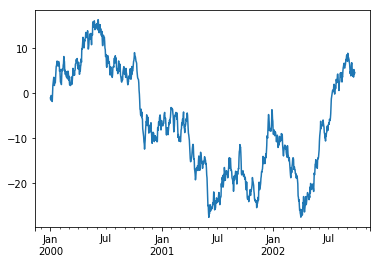

In [4]:
ts.plot()

In [5]:
df = pd.DataFrame(np.random.randn(1000, 4), 
                  index = ts.index, columns = list('ABCD'))

In [6]:
df = df.cumsum()

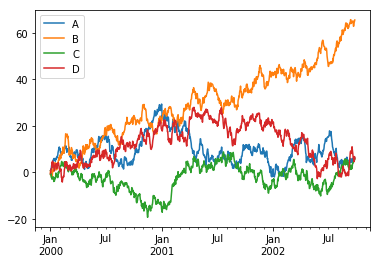

In [7]:
plt.figure(); df.plot();

In [8]:
df3 = pd.DataFrame(np.random.randn(1000,2), columns
                   = ['B', 'C']).cumsum()

In [9]:
df3['A'] = pd.Series(list(range(len(df))))

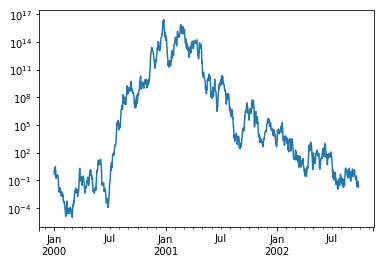

In [10]:
#pass logy to get a log-scale y-axis
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = np.exp(ts.cumsum())
ts.plot(logy=True)

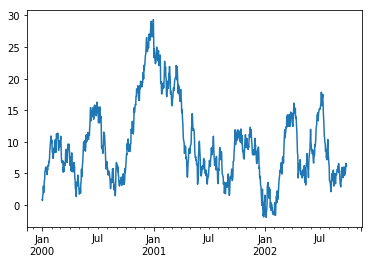

In [11]:
df.A.plot()

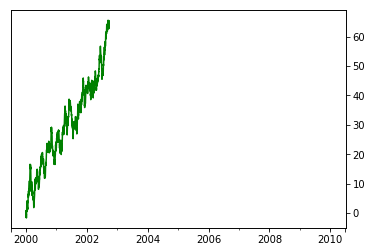

In [12]:
df.B.plot(secondary_y=True, style='g')

In [14]:
#To plot some columns in a DataFrame, give the column names to the secondary_y keyword:
plt.figure()

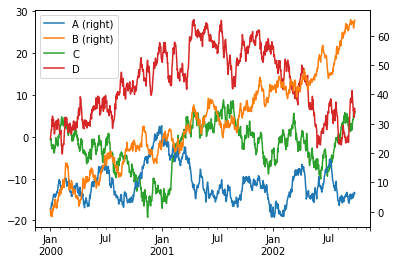

In [15]:
ax = df.plot(secondary_y=['A', 'B'])

In [16]:
ax.set_ylabel('CD scale')

Text(3.2,0.5,'CD scale')

In [17]:
ax.right_ax.set_ylabel('AB scale')

Text(393.625,0.5,'AB scale')

In [26]:

plt.figure()
# plt.show()

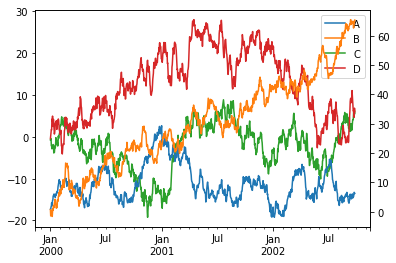

In [28]:
df.plot(secondary_y=['A', 'B'], mark_right=False) #set false to turn off the automatic marking

## Pandas for data analysis | scipy 2017 Tutorial | Dainiel Chen

In 2017, Dainiel Chen gave a very nice presentation in SciPy meeting. I watched his vedio in the (youtube)[https://www.youtube.com/watch?v=oGzU688xCUs], hence I added some note in this section. All the imported files mentioned in this section can be found in Chen's github (repo.)[https://github.com/chendaniely/scipy-2017-tutorial-pandas]. For my convenience, I moved the folder 'data' in his repo to chapter05 in my current repo.

In [1]:
import pandas as pd

In [2]:
#check the version of the padas you are using
pd.__version__

'0.21.0'

In [3]:
print('the version of pandas in my computer is', pd.__version__)

the version of pandas in my computer is 0.21.0


In [4]:
pd.read_csv('./chapter05/data/gapminder.tsv', delimiter='\t').head(10)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [5]:
pd.read_csv('./chapter05/data/gapminder.tsv', delimiter='\t').head() # 如果括号中不指定，默认是5，所以只打印出表格的前面五行

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [6]:
#let us specify df for the imported file
df = pd.read_csv("./chapter05/data/gapminder.tsv", delimiter='\t')

In [7]:
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [8]:
df.head(10)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.shape

(1704, 6)

In [20]:
df.shape() #you will see an error because as you see above, df.shape is a tuple

TypeError: 'tuple' object is not callable

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
